# Plume Feedback Test

In [101]:
%matplotlib inline
from IPython.display import display, Markdown
import fnmatch
import scipy.optimize as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import glob
from IPython.display import set_matplotlib_formats
from scipy.optimize import curve_fit
import re
import datetime as dt 
import scipy.signal
import matplotlib.ticker as mticker
import math
from IPython.display import display, Latex
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_formats = ['svg']
plt.rcParams['savefig.dpi'] = 350
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 7.
# plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 12

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

In [115]:
save_path = 'C:\\Users\\super\\Dropbox\\Rice University\\501\\BL_Interactions_Data\\'
overshootData = pd.read_csv(save_path+'overshoot_data.csv')
plumeData = pd.read_csv(save_path+'single_plume_data_overshoot.csv')
plumeDataMid = pd.read_csv(save_path+'single_plume_data_overshoot_mid_depth.csv')

plumeData['Difference'] = overshootData['Difference']
plumeData['ThicknessMid'] = plumeDataMid['Thickness']
plumeData['Z Speed Mid'] = plumeDataMid['Z Speed']
plumeData.drop(plumeData.tail(2).index,inplace = True)
plumeData = plumeData[plumeData['Ra'] != 3e8]; 
plumeData

,Ra,Number,Mean T,STDEV,Max T,Min T,Speed,Z Speed,Thickness,Difference,ThicknessMid,Z Speed Mid
0,1.000000e+04,2,0.657254,0.000493,0.657747,0.656761,1.787829e+03,36.261476,0.165158,0.011790,0.095119,56.800699
1,1.000000e+05,2,0.671318,0.000797,0.672115,0.670521,3.524553e+04,127.472093,0.093847,0.018740,0.027018,416.148162
2,1.000000e+06,2,0.680358,0.001070,0.681428,0.679289,6.251093e+05,335.220581,0.063703,0.021892,0.009410,2302.364167
3,3.000000e+06,1,0.599849,0.000000,0.599849,0.599849,2.663291e+06,112.409638,0.372557,0.040666,0.031007,3150.913574
4,1.000000e+07,1,0.631952,0.000000,0.631952,0.631952,5.353217e+06,1342.295869,0.095429,0.039668,0.015519,7233.535902
5,3.000000e+07,1,0.444532,0.000000,0.444532,0.444532,2.734742e+06,66.839251,0.310073,0.032483,0.027131,3288.420592
6,1.000000e+08,4,0.624765,0.031228,0.674792,0.590186,4.965763e+07,860.863052,0.006779,0.033541,0.002180,26518.000000
8,6.000000e+08,8,0.613626,0.019002,0.651158,0.589815,2.845570e+07,178.226278,0.026698,0.024253,0.000757,64447.875000
9,1.000000e+09,15,0.579263,0.021396,0.629022,0.558975,1.638136e+07,173.166500,0.001394,0.022406,0.000539,47685.222222
10,3.000000e+09,10,0.631345,0.018487,0.662719,0.607090,2.877868e+08,163.347250,0.002960,0.019508,0.000341,118078.571429


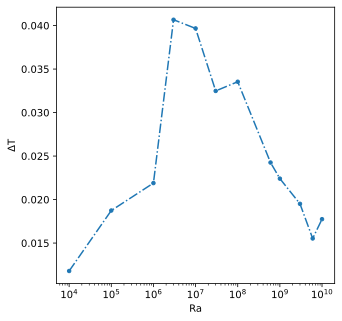

In [44]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log');
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('ΔT');
plt.xticks(np.logspace(4,10,num=7));

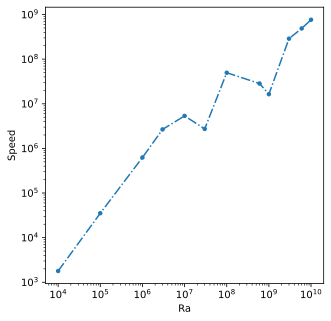

In [45]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Speed'],'.',linestyle='-.')
plt.xscale('log'); plt.yscale('log')
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Speed');
plt.xticks(np.logspace(4,10,num=7));

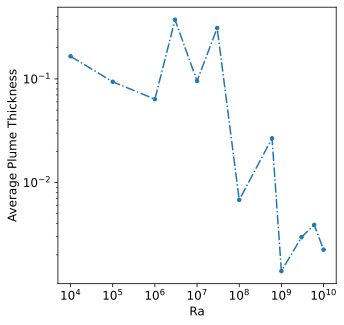

In [153]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Thickness'],'.',linestyle='-.')
plt.xscale('log'); 
plt.yscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Average Plume Thickness');
plt.xticks(np.logspace(4,10,num=7));

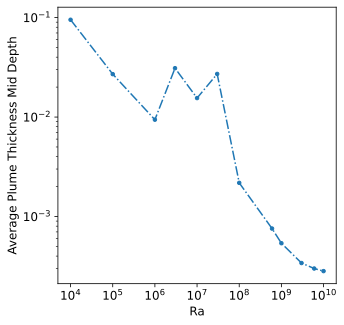

In [114]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['ThicknessMid'],'.',linestyle='-.')
plt.xscale('log'); 
plt.yscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Average Plume Thickness Mid Depth');
plt.xticks(np.logspace(4,10,num=7));

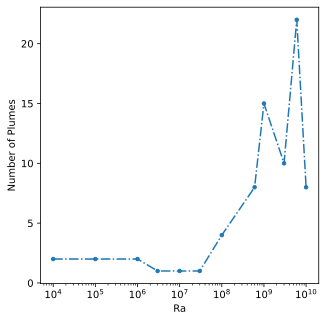

In [76]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Number'],'.',linestyle='-.')
plt.xscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Number of Plumes');
plt.xticks(np.logspace(4,10,num=7));

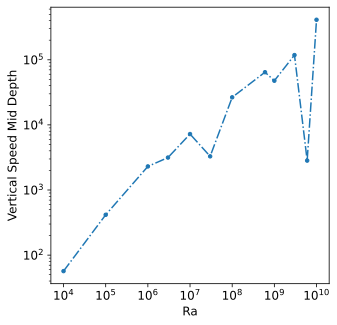

In [117]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Ra'],plumeData['Z Speed Mid'],'.',linestyle='-.')
plt.xscale('log'); plt.yscale('log')
# plt.title('Overshoot Difference Both')
plt.xlabel('Ra')
plt.ylabel('Vertical Speed Mid Depth');
plt.xticks(np.logspace(4,10,num=7));

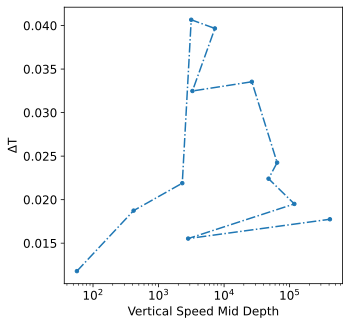

In [118]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Z Speed Mid'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Vertical Speed Mid Depth')
plt.ylabel('ΔT');

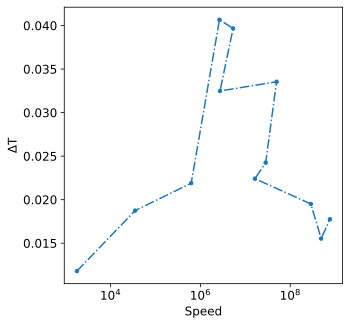

In [104]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['Speed'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log'); 
# plt.title('Overshoot Difference Both')
plt.xlabel('Speed')
plt.ylabel('ΔT');

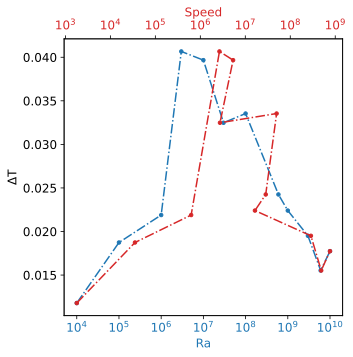

In [128]:
fig, ax1 = plt.subplots(figsize=(5,5))
plt.xscale('log'); 
plt.xlabel('Ra')
plt.ylabel('ΔT')
plt.xticks(np.logspace(4,10,num=7));
color = 'tab:blue'
ax1.set_xlabel('Ra', color=color);
ax1.tick_params(axis='x', labelcolor=color);
ax2 = ax1.twiny()  
ax1.plot(plumeData['Ra'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log'); 
color = 'tab:red'
ax2.plot(plumeData['Speed'],plumeData['Difference'],'.',linestyle='-.', color=color)
plt.xscale('log');
plt.xticks(np.logspace(4,10,num=7));
ax2.set_xlabel('Speed', color=color);
ax2.tick_params(axis='x', labelcolor=color);

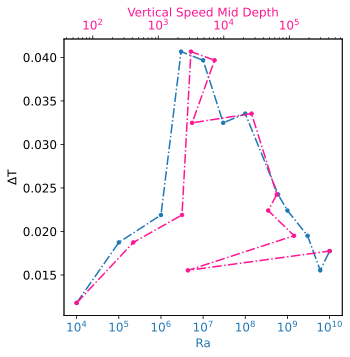

In [145]:
fig1, ax1 = plt.subplots(figsize=(5,5))
plt.xscale('log'); 
plt.xlabel('Ra')
plt.ylabel('ΔT')
plt.xticks(np.logspace(4,10,num=7));
color = 'tab:blue'
ax1.set_xlabel('Ra', color=color);
ax1.tick_params(axis='x', labelcolor=color);
ax2 = ax1.twiny()  
ax1.plot(plumeData['Ra'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log'); 
color = 'deeppink'
ax2.plot(plumeData['Z Speed Mid'],plumeData['Difference'],'.',linestyle='-.', color=color)
plt.xscale('log');
ax2.set_xlabel('Vertical Speed Mid Depth', color=color);
ax2.tick_params(axis='x', labelcolor=color);

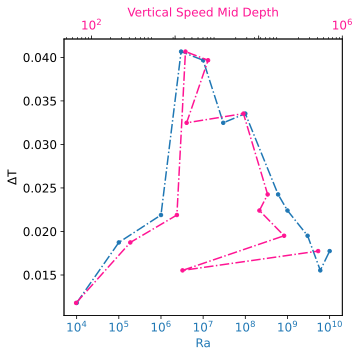

In [142]:
fig1, ax1 = plt.subplots(figsize=(5,5))
plt.xscale('log'); 
plt.xlabel('Ra')
plt.ylabel('ΔT')
plt.xticks(np.logspace(4,10,num=7));
color = 'tab:blue'
ax1.set_xlabel('Ra', color=color);
ax1.tick_params(axis='x', labelcolor=color);
ax2 = ax1.twiny()  
ax1.plot(plumeData['Ra'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log'); 
color = 'deeppink'
ax2.plot(plumeData['Z Speed Mid'],plumeData['Difference'],'.',linestyle='-.', color=color)
plt.xscale('log');
plt.xticks(np.logspace(2,6,num=4));
ax2.set_xlabel('Vertical Speed Mid Depth', color=color);
ax2.tick_params(axis='x', labelcolor=color);

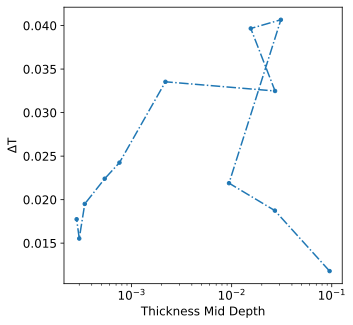

In [152]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(plumeData['ThicknessMid'],plumeData['Difference'],'.',linestyle='-.')
plt.xscale('log'); 
plt.xlabel('Thickness Mid Depth')
plt.ylabel('ΔT');